<a href="https://colab.research.google.com/github/EstebanFTellezR/Modelaci-n-y-aja/blob/main/Alguito_de_Correlacio%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlación

### Definición:
La correlación es una medida estandarizada de la asociación o dependencia estadística entre dos variables aleatorias. Matemáticamente, para dos variables aleatorias $X$ e $Y$, la correlación $\rho$ se define como:

$$\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\bar{X})(Y-\bar{Y})]}{\sigma_X \sigma_Y},$$

donde:

$\text{Cov}(X,Y)$ es la covarianza entre $X$ e $Y$.

$\bar{X}$ es la desviación estándar de $X$.

$\bar{Y}$ es la desviación estándar de $Y$.



En la segunda igualdad de la expresión anterior se usa la definición formal de covarianza, así:

$E$ es el operador de esperanza matemática,

$\mu_X$ es la media de $X$.

$\mu_Y$ es la media de $Y$.

-----------------------

La correlación en matemáticas es una medida que indica la fuerza y dirección de la relación entre dos variables.

La correlación se expresa mediante un coeficiente que va desde -1 hasta 1, donde:

1 indica una correlación positiva perfecta,

0 indica que no hay correlación,

-1 indica una correlación negativa perfecta.

--------------------------------------------

En términos concretos se tiene:

**Correlación positiva:** Cuando una variable aumenta, la otra también aumenta. Como la relación entre altura y peso en personas.

**Correlación negativa:** Cuando una variable aumenta, la otra disminuye. Como la relación entre velocidad y tiempo para recorrer una distancia fija.

**Sin correlación:** Los cambios en una variable no afectan a la otra.

### Ejemplo 1
A continuación se da un conjunto de datos para calcular la correlación entre las horas de estudio y las calificaciones de unos estudiantes:

In [ ]:
import numpy as np
horas_estudio = np.array([1, 2, 3, 4, 5, 6, 7, 8])
calificaciones = np.array([65, 70, 75, 80, 85, 88, 90, 92])

Ahora procedemos a calcular la correlación de los datos:

In [ ]:
def calcular_correlacion(x, y):
    # 1. Calculamos medias
    media_x = np.mean(x)
    media_y = np.mean(y)

    # 2. Calculamos desviaciones
    dx = x - media_x
    dy = y - media_y

    # 3. Multiplicamos desviaciones
    producto_desviaciones = dx * dy

    # 4. Calculamos desviaciones estándar
    std_x = np.std(x)
    std_y = np.std(y)

    # 5. Calculamos correlación
    correlacion = np.sum(producto_desviaciones) / (len(x) * std_x * std_y)

    return correlacion

# Calculamos la correlación
correlacion = calcular_correlacion(horas_estudio, calificaciones)
correlacion

0.985314914659046

La correlación calculada es aproximadamente 0.99 , lo que indica una correlación positiva muy fuerte.

Esto significa que:
- A más horas de estudio, mejores calificaciones
- La relación es casi lineal
- El 0.99 nos dice que el $99 \%$ de la variación en las calificaciones puede explicarse por las horas de estudio

Ahora veamos una gráfica de la correlación entre horas de estudio y calificaciones, donde los puntos azules son los datos reales, la línea roja muestra la tendencia y la pendiente positiva confirma la correlación positiva:

Coeficiente de correlación: 0.99


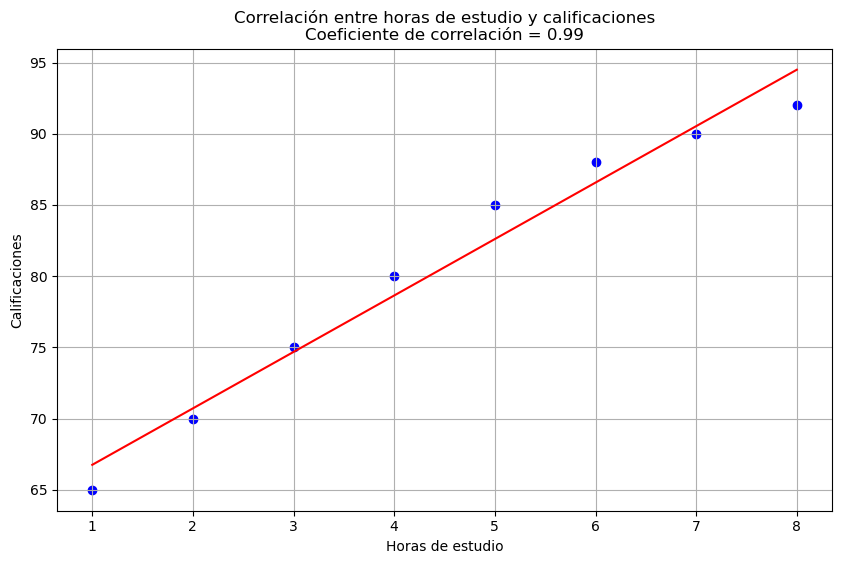

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(horas_estudio, calificaciones, color='blue')
plt.plot(horas_estudio, np.poly1d(np.polyfit(horas_estudio, calificaciones, 1))(horas_estudio), color='red')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificaciones')
plt.title(f'Correlación entre horas de estudio y calificaciones\nCoeficiente de correlación = {correlacion:.2f}')
plt.grid(True)

print(f"Coeficiente de correlación: {correlacion:.2f}")

### Coeficientes de correlación

La correlación tiene diferentes fórmulas dependiendo del tipo de coeficiente que se use. Los más comunes son:

**Coeficiente de Correlación de Pearson $(r)$**

Es el más utilizado y mide relaciones lineales. Se define como:

$$ r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}.$$

Donde:
- $x$ e $y$ son las variables.
- $\bar{x}$ y $\bar{y}$ son las medias.
- $\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}$ y $\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}$ son las desviaciones estándar.
- $n$ es el número de observaciones.
  
**Coeficiente de Correlación de Spearman $(\rho)$**

Se usa para relaciones monótonas (no necesariamente lineales) y datos ordinales. Se define como:

$$ \rho = 1 - \frac{6\sum_{i=1}^n d_i^2}{n(n^2-1)}$$

Donde:
- $d$ es la diferencia entre los rangos de cada observación.
- $n$ es el número de observaciones.

**Coeficiente de Correlación de Kendall $(\tau)$**
  
También para datos ordinales, más robusto que Spearman. Se define como:

$$ \tau = \frac{n_c - n_d}{\frac{1}{2}n(n-1)} $$

Donde:
- $n_c$ es el número de pares concordantes.
- $n_d$ es el número de pares discordantes.
- $n$ es el número de observaciones.

### Ejemplo 2
Vamos a generar un set de datos donde $Y$ crece de forma cuadrática con $X$ (esto se conoce como aumento del ruido aleatorio):

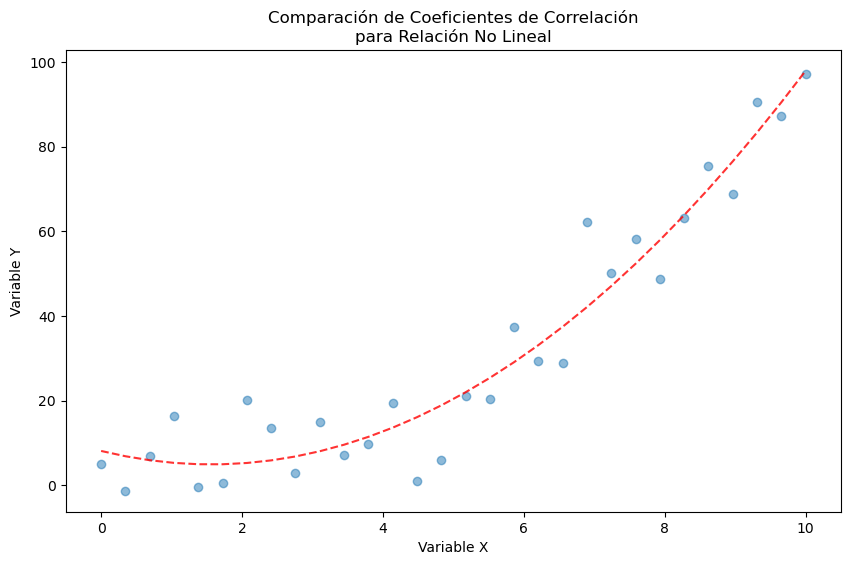

In [ ]:
from scipy import stats

# Generamos datos con relación no lineal pero monótona
np.random.seed(42)
x = np.linspace(0, 10, 30)
y = x**2 + np.random.normal(0, 10, 30)

# Creamos la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('Variable X')
ax.set_ylabel('Variable Y')
ax.set_title('Comparación de Coeficientes de Correlación\npara Relación No Lineal')

# Añadimos la línea de tendencia polinomial para visualizar la relación
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x, p(x), 'r--', alpha=0.8)

Ahora vamos a calcular los tres coeficientes de correlación

In [ ]:
pearson_r, _ = stats.pearsonr(x, y)
spearman_rho, _ = stats.spearmanr(x, y)
kendall_tau, _ = stats.kendalltau(x, y)

print(f"Pearson r = {pearson_r:.3f}")
print(f"Spearman ρ = {spearman_rho:.3f}")
print(f"Kendall τ = {kendall_tau:.3f}")

Pearson r = 0.899
Spearman ρ = 0.900
Kendall τ = 0.752


Observemos que:

**Correlación de Pearson $(\approx 0.899)$**

- Da el valor más bajo porque la relación no es lineal
- Subestima la fuerza de la relación porque busca solo linealidad

**Correlación de Spearman $(\approx 0.900)$**

- Da un valor más alto porque detecta que Y crece consistentemente con X
- No le importa que la relación sea cuadrática
  
**Correlación de Kendall $(\approx 0.752)$**
- Similar a Spearman pero más conservadora
- Más robusta frente a valores atípicos

Este es un caso típico donde la elección del coeficiente importa:

- Si usáramos solo Pearson, podríamos subestimar la relación
- Spearman nos muestra que hay una fuerte relación monótona
- Kendall confirma esta relación de manera más robusta

### Ejemplo 3

Este ejemplo muestra cuatro tipos diferentes de relaciones:

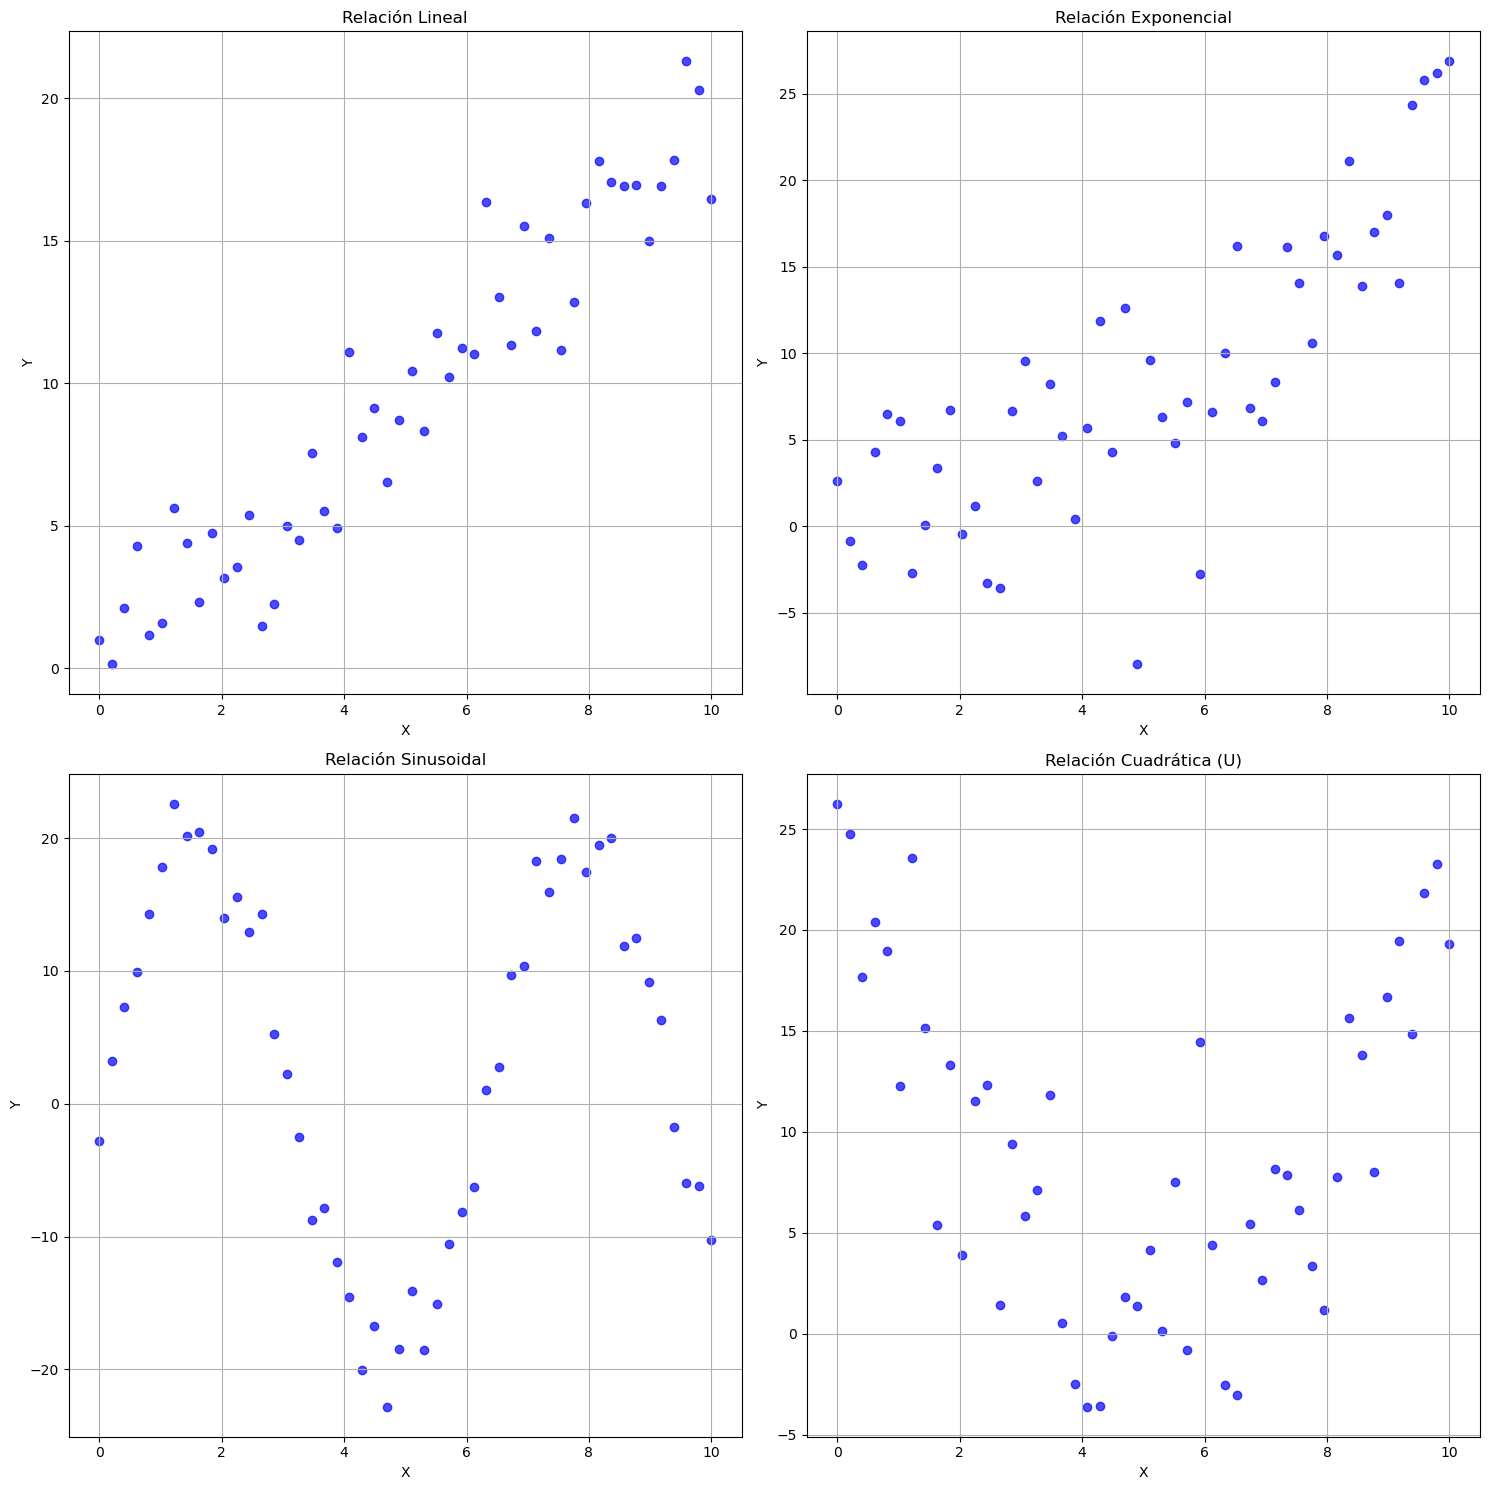

In [ ]:
np.random.seed(42)
n_points = 50

# Generamos diferentes tipos de relaciones
x = np.linspace(0, 10, n_points)

# 1. Relación lineal con ruido
y1 = 2*x + np.random.normal(0, 2, n_points)

# 2. Relación exponencial
y2 = np.exp(x/3) + np.random.normal(0, 5, n_points)

# 3. Relación sinusoidal
y3 = 20*np.sin(x) + np.random.normal(0, 2, n_points)

# 4. Relación en forma de U
y4 = (x - 5)**2 + np.random.normal(0, 5, n_points)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

datos = [(x, y1, "Relación Lineal"),
         (x, y2, "Relación Exponencial"),
         (x, y3, "Relación Sinusoidal"),
         (x, y4, "Relación Cuadrática (U)")]

for ax, (x_data, y_data, titulo) in zip(axs.flat, datos):
    ax.scatter(x_data, y_data, color='b', alpha=0.7)
    ax.set_title(titulo)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)

plt.tight_layout()
plt.show()

Ahora, calculamos las correlaciones y las mostramos en cada gráfico:

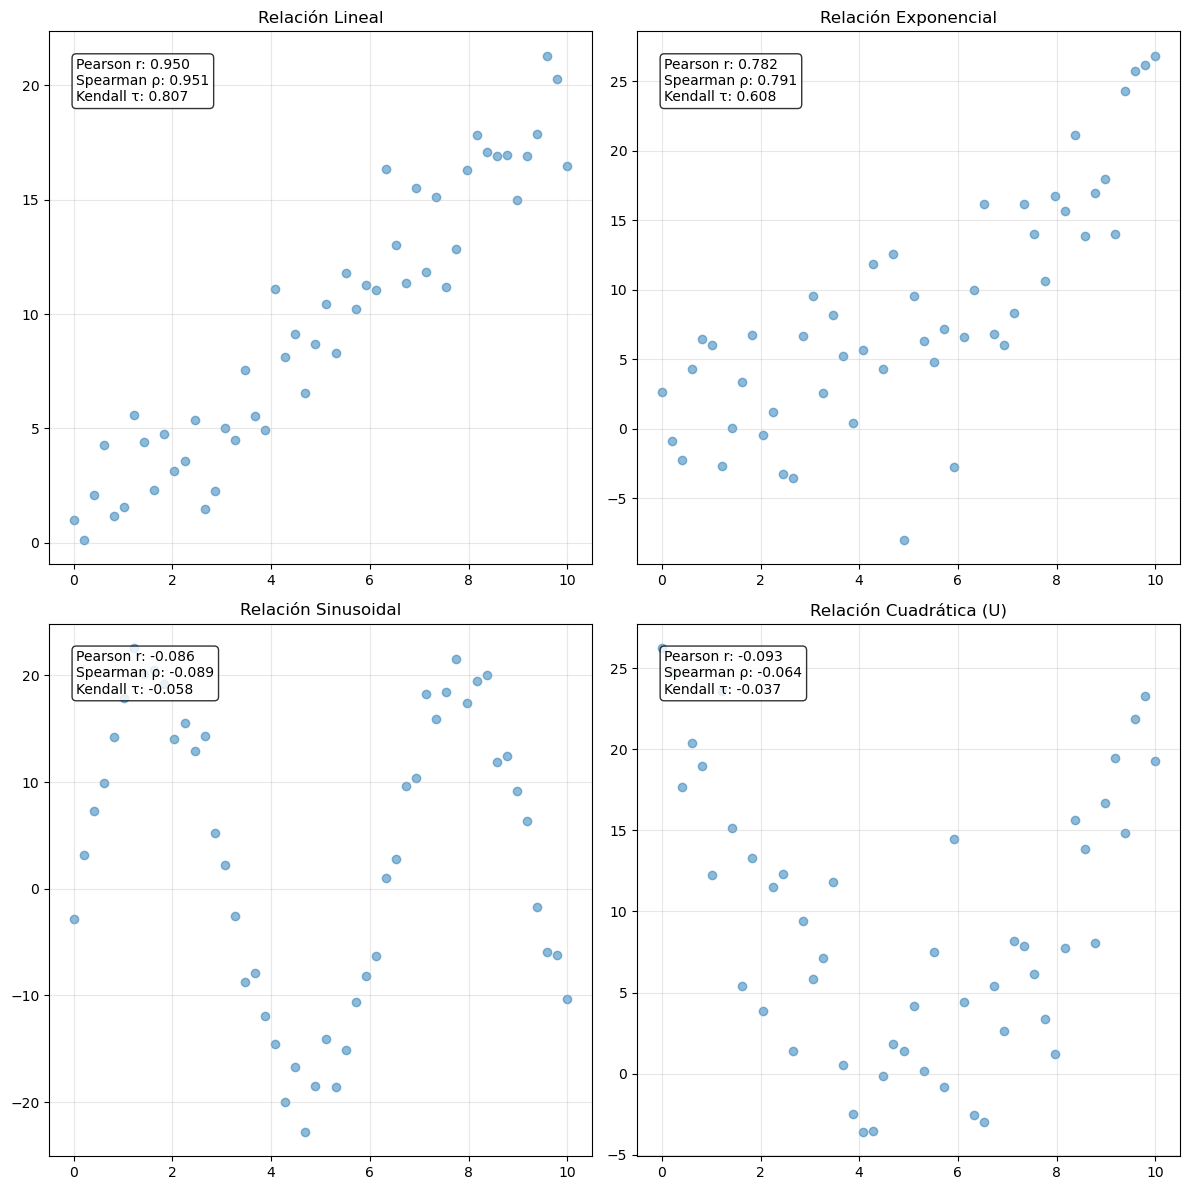

In [ ]:
def calcular_correlaciones(x, y):
    pearson = stats.pearsonr(x, y)[0]
    spearman = stats.spearmanr(x, y)[0]
    kendall = stats.kendalltau(x, y)[0]
    return pearson, spearman, kendall

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for idx, (x_data, y_data, titulo) in enumerate(datos):
    ax = axs.flat[idx]
    pearson, spearman, kendall = calcular_correlaciones(x_data, y_data)

    ax.scatter(x_data, y_data, alpha=0.5)
    ax.set_title(titulo)
    ax.grid(True, alpha=0.3)

    text = f'Pearson r: {pearson:.3f}\n'
    text += f'Spearman ρ: {spearman:.3f}\n'
    text += f'Kendall τ: {kendall:.3f}'

    ax.text(0.05, 0.95, text, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round',
            facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

De los cuatro tipos de relaciones, podemos evidenciar que:

**Relación Lineal**

- Pearson es muy alto porque la relación es lineal.
- Los tres coeficientes dan valores similares y altos.
- Este es el caso ideal para Pearson.


**Relación Exponencial**

- Pearson subestima la relación.
- Spearman y Kendall dan valores más altos porque detectan la monotonía.
- Demuestra la ventaja de usar coeficientes no paramétricos.


**Relación Sinusoidal**

- Todos los coeficientes dan valores cercanos a cero.
- Muestra que ningún coeficiente detecta bien relaciones periódicas.
- La correlación no es buena para patrones cíclicos.


**Relación Cuadrática (U)**

- Pearson da un valor cercano a cero.
- Spearman y Kendall también fallan.
  
Este es un ejemplo perfecto de una relación fuerte que ninguna correlación detecta bien. Aquí podemos notar que:

- No existe un "mejor" coeficiente de correlación.
- La elección depende del tipo de relación que esperamos.
- A veces necesitamos usar otros métodos más allá de la correlación.

### Ejemplo 4

Vamos a dar una demostración matemática de como se obtiene el coeficiente de Pearson, a partir de la definición formal de correlación.

\textbf{Demostración:} Se sigue d elos siguientes pasos.

Partimos de la definición formal de correlación:

$$\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}.$$

2. Para una muestra de tamaño n, la covarianza muestral es:

$$\text{Cov}(X,Y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).$$

3. Las desviaciones estándar muestrales son:

$$\sigma_X = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2},$$
$$\sigma_Y = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2}.$$

4. Sustituyendo en la fórmula original:

$$\rho_{X,Y} = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2}}.$$

5. Simplificando los factores  $\dfrac{1}{n}$:
$$\rho_{X,Y} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}.$$

6. Esta última expresión es exactamente el coeficiente de correlación de Pearson:

$$r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$$

Por lo tanto:
      $$\rho_{X,Y} = r$$